# This notebook makes the images shown in README.md

The point of these images is to demonstrate that the package can easily fit raw VNA data in which the phase delay has not been removed. For a more instructive tutorial, see `basic.ipynb`.

In [1]:
from __future__ import division, absolute_import, print_function
%matplotlib inline

import lmfit
import matplotlib.pyplot as plt
import numpy as np

from resonator import background, shunt, see

In [2]:
# Background model and parameters
background_model = background.MagnitudePhaseDelay()
magnitude = 0.01
phase = -np.pi / 3
delay = 300e-9  # This corresponds to a long microwave cable

# Foreground model and parameters
foreground_model = shunt.LinearShunt()
resonance_frequency = 4e9
internal_loss = 1e-5  # Q_i = 100 000
coupling_loss = 5e-5  # Q_c = 20 000

# Create an array of measurement frequencies
linewidth = resonance_frequency * (internal_loss + coupling_loss)
frequency = np.linspace(resonance_frequency - 8 * linewidth, resonance_frequency + 8 * linewidth, 501)

# Create the data by evaluating the model functions with the given parameters
bg = background_model.func(frequency=frequency, magnitude=magnitude, phase=phase, delay=delay, frequency_reference=frequency.mean())
fg = foreground_model.func(frequency=frequency, resonance_frequency=resonance_frequency, internal_loss=internal_loss, coupling_loss=coupling_loss, asymmetry=0)

# The ideal data is the product of the background and foreground, and we add some noise to this.
data = bg * fg + 0.02 * magnitude * (np.random.randn(frequency.size) + 1j * np.random.randn(frequency.size)) 

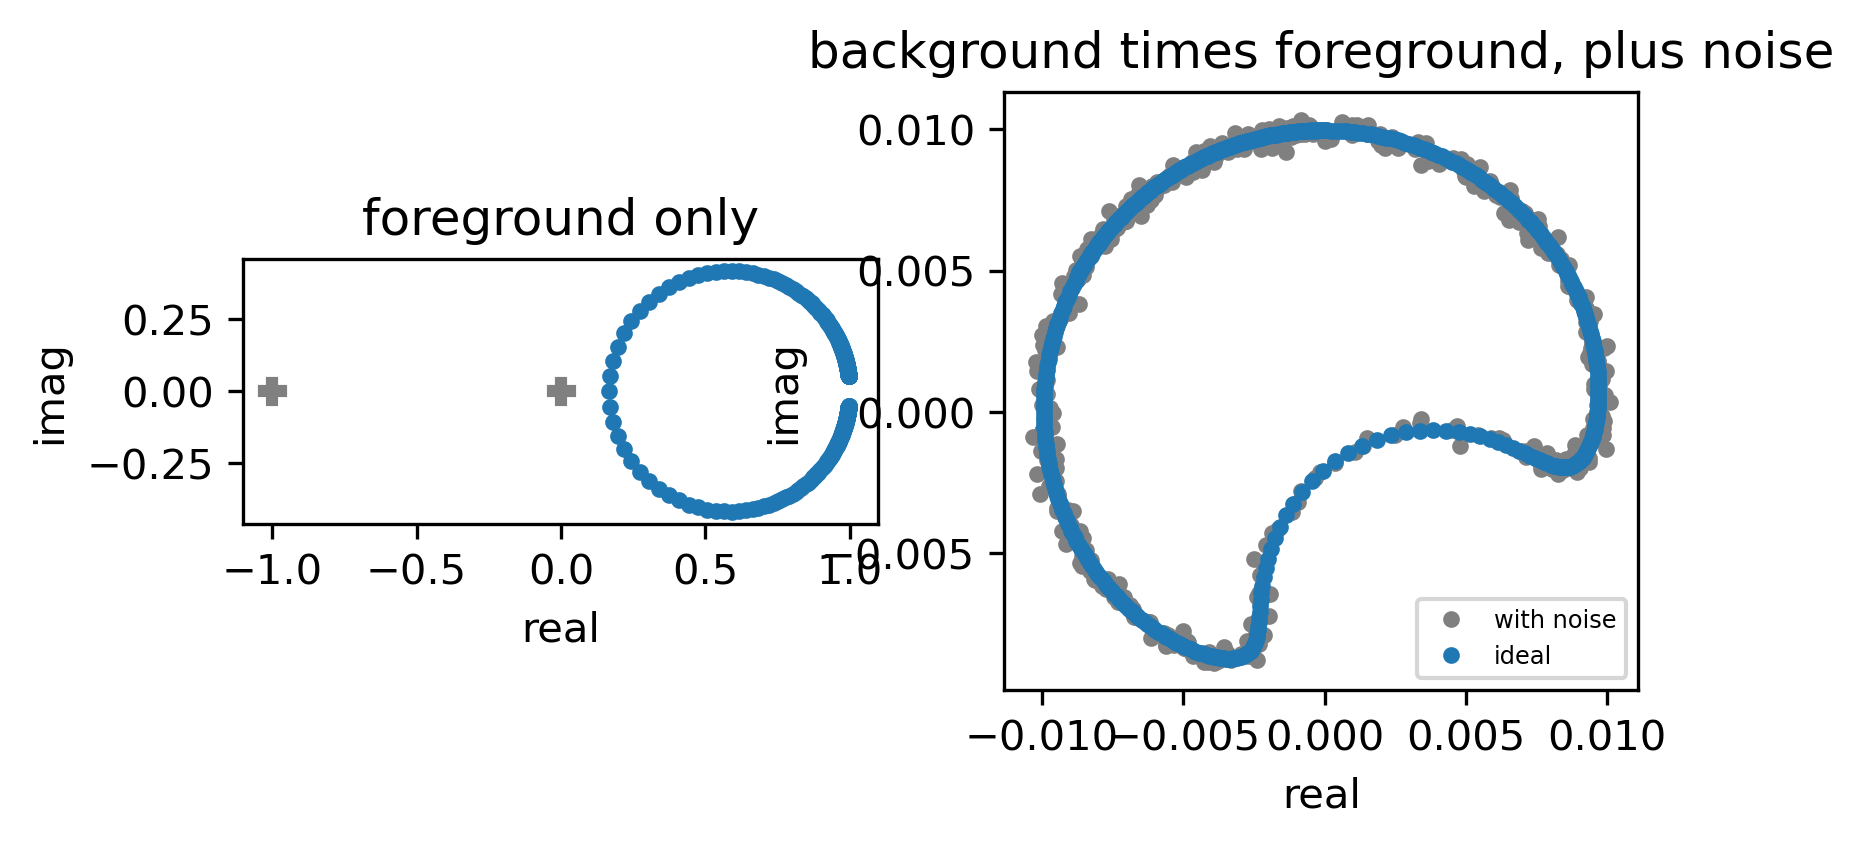

In [3]:
fig, (ax_fg, ax_bgfg) = plt.subplots(1, 2, figsize=(6, 3), dpi=300)

ax_fg.set_aspect('equal')
ax_fg.set_xlabel('real')
ax_fg.set_ylabel('imag')
ax_fg.plot(fg.real, fg.imag, '.')
ax_fg.plot([0, -1], [0, 0], marker='P', linestyle='none', color='gray')
ax_fg.set_title('foreground only')

ax_bgfg.set_aspect('equal')
ax_bgfg.set_xlabel('real')
ax_bgfg.set_ylabel('imag')
ax_bgfg.plot(data.real, data.imag, '.', color='gray', label='with noise')
ax_bgfg.plot((bg * fg).real, (bg * fg).imag, '.', label='ideal')
ax_bgfg.legend(fontsize='xx-small')
ax_bgfg.set_title('background times foreground, plus noise');

In [4]:
lsf = shunt.LinearShuntFitter(frequency=frequency, data=data, background_model=background.MagnitudePhaseDelay())

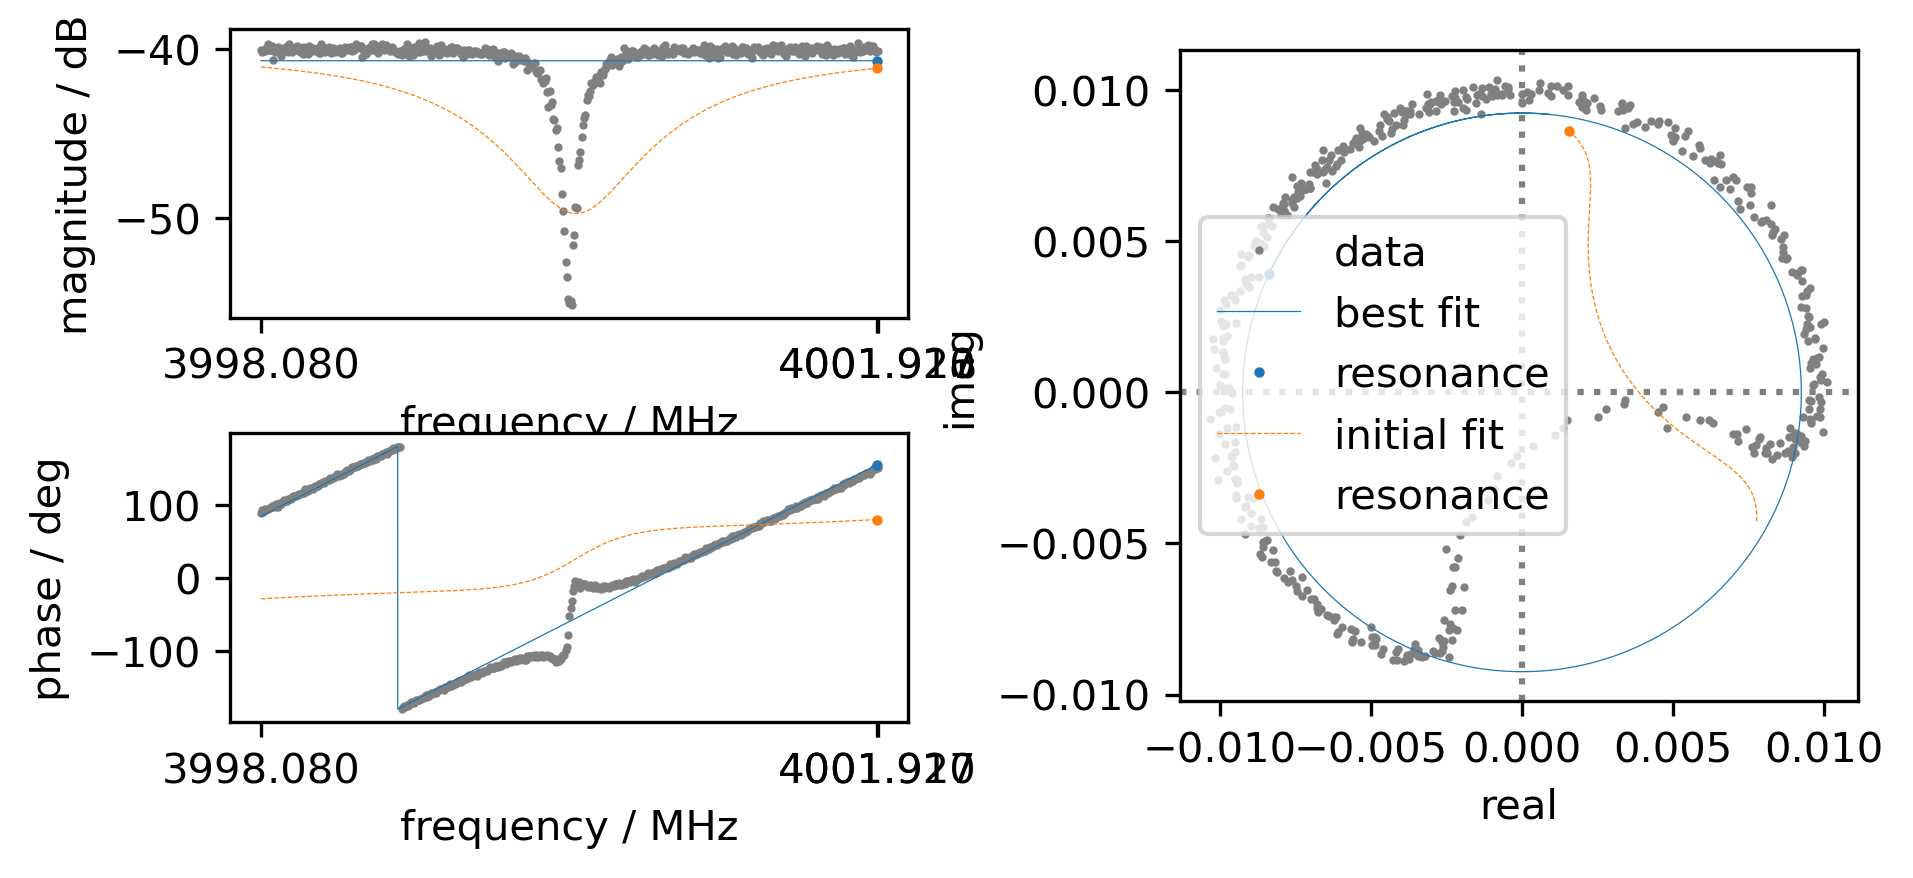

In [5]:
fig, (ax_magnitude, ax_phase, ax_complex) = see.triptych(resonator=lsf, plot_initial=True, frequency_scale=1e-6, normalize=False, figure_settings={'figsize': (7, 3), 'dpi': 300})
ax_complex.legend()
fig.savefig("example_raw.png")

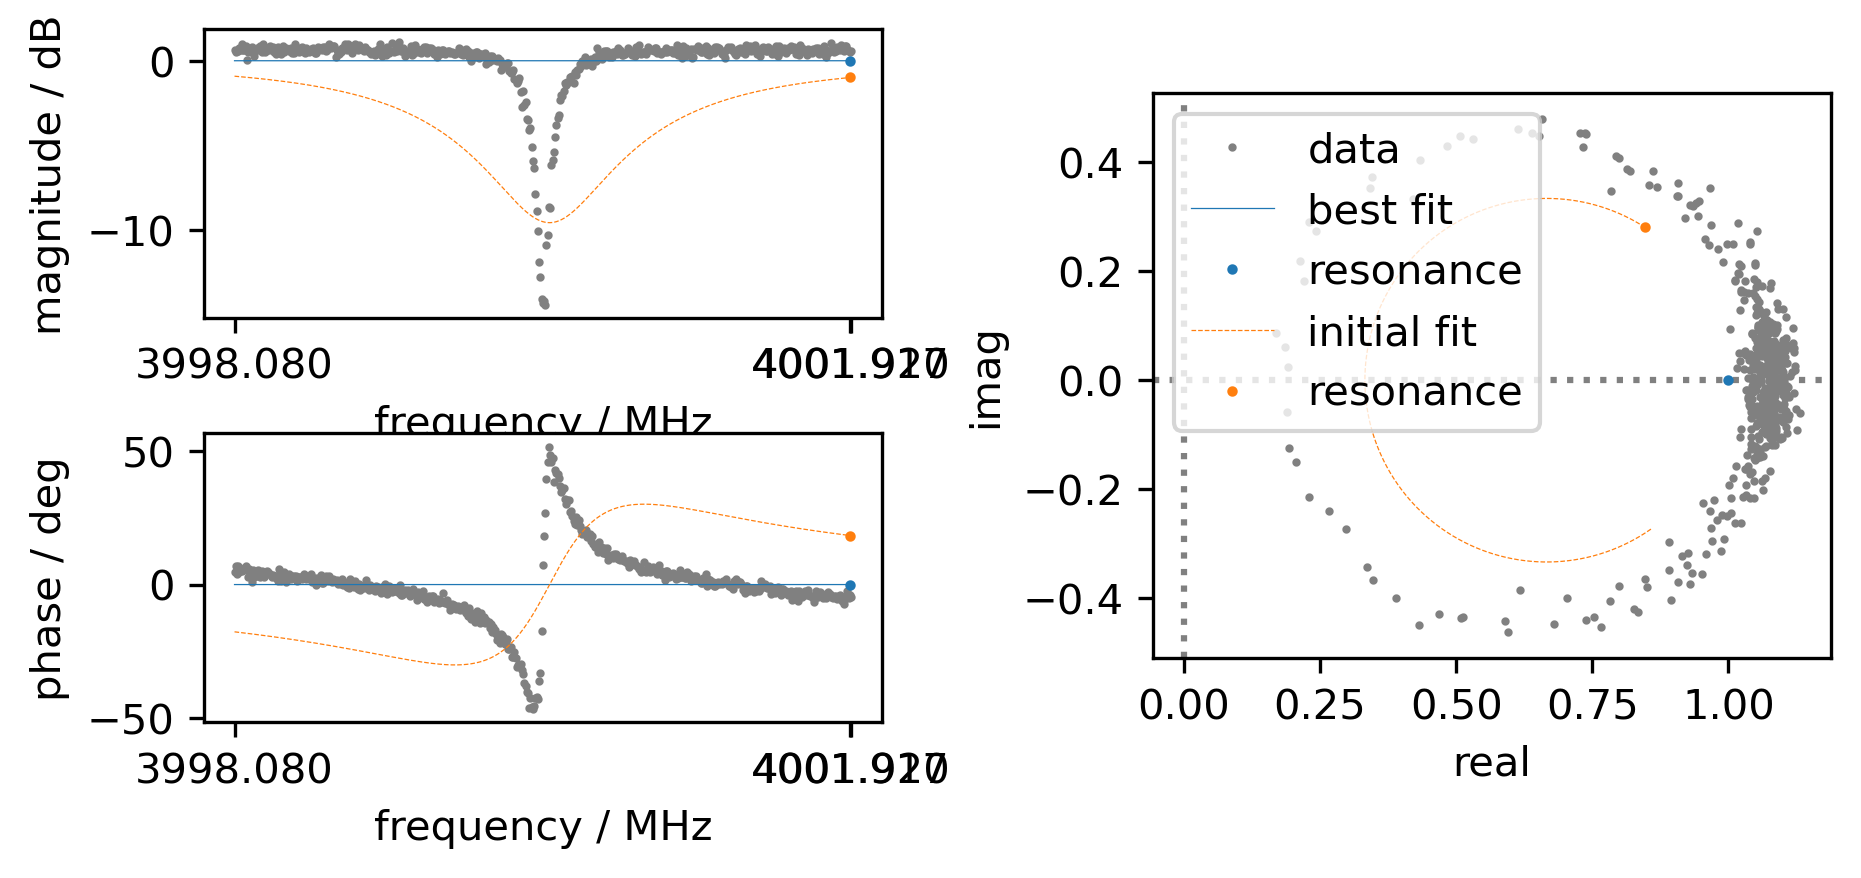

In [6]:
fig, (ax_magnitude, ax_phase, ax_complex) = see.triptych(resonator=lsf, plot_initial=True, frequency_scale=1e-6, normalize=True, figure_settings={'figsize': (7 ,3), 'dpi': 300})
ax_complex.legend()
fig.savefig("example_normalized.png")